<a href="https://colab.research.google.com/github/andisutrakhusnulkarima/DeepLearning/blob/main/Week4_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


Epoch 1/5, Loss: 1.8931
Epoch 2/5, Loss: 1.8766
Epoch 3/5, Loss: 1.8602
Epoch 4/5, Loss: 1.8438
Epoch 5/5, Loss: 1.8273


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.7362 - loss: 0.6262 - val_accuracy: 0.7916 - val_loss: 0.4828
Epoch 2/5
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.7980 - loss: 0.4700 - val_accuracy: 0.8116 - val_loss: 0.4392
Epoch 3/5
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.8187 - loss: 0.4284 - val_accuracy: 0.8263 - val_loss: 0.4133
Epoch 4/5
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 0.8298 - loss: 0.4050 - val_accuracy: 0.8355 - val_loss: 0.3956
Epoch 5/5
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - accuracy: 0.8357 - loss: 0.3918 - val_accuracy: 0.8409 - val_loss: 0.3823
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
{'Accuracy': 0.4698071478361144, 'Precision': 0.5215998711756262, 'Recall': 0.4698071478361144, 'F1-Score': 0.43709683042100067, 'F1-Squared': 0.19105363916408502, 'AUC-ROC': 0.5794479478564492}


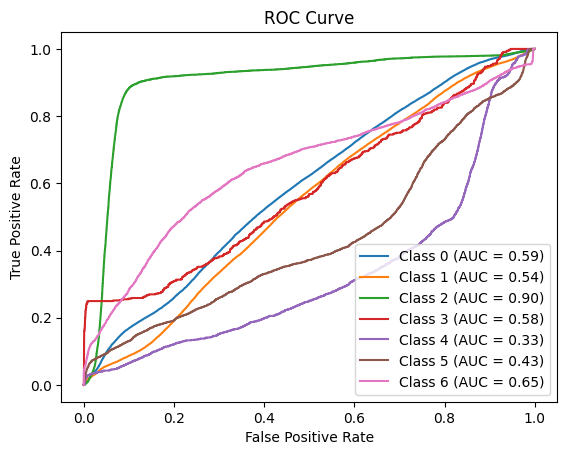


### Mathematical Explanation
1. **Softmax Function**:
   \[ \hat{y}_i = rac{e^{z_i}}{\sum_{j} e^{z_j}} \]
   - Digunakan dalam lapisan output untuk menghasilkan probabilitas kelas.

2. **CrossEntropyLoss**:
   \[ L = - \sum_{i=1}^{N} y_i \log(\hat{y}_i) \]
   - Digunakan untuk klasifikasi multi-kelas.
   - \( y_i \) adalah label sebenarnya (one-hot encoding).
   - \( \hat{y}_i \) adalah probabilitas prediksi model setelah softmax.

3. **Accuracy**:
   \[ Accuracy = rac{TP + TN}{TP + TN + FP + FN} \]

4. **Precision, Recall, F1-Score, F1-Squared**:
   \[ Precision = rac{TP}{TP + FP} \]
   \[ Recall = rac{TP}{TP + FN} \]
   \[ F1 = 2 	imes rac{Precision 	imes Recall}{Precision + Recall} \]
   \[ F1^2 = (F1) ^ 2 \]

5. **AUC-ROC**:
   - Area di bawah kurva ROC yang menunjukkan trade-off antara TPR dan FPR.
   - Semakin tinggi nilai AUC, semakin baik model dalam membedakan kelas.



In [3]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load Dataset from URL
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/compressed_data.csv.gz"
df = pd.read_csv(url, compression="gzip", on_bad_lines="skip")

# Display first 5 rows
display(df.head())

X = df.drop(columns=["Cover_Type"]).values
y = df["Cover_Type"].values

# Adjust labels to start from 0
y -= 1

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.long)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.long)

# PyTorch Model
class MLP_PyTorch(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP_PyTorch, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_dim)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate and Train Model
model = MLP_PyTorch(X_train.shape[1], len(np.unique(y)))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
epochs = 5
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Evaluate PyTorch Model
model.eval()
y_pred_torch = model(X_test_torch).argmax(dim=1).numpy()

# TensorFlow Model
model_tf = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

# Compile and Train TensorFlow Model
model_tf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_tf.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# Evaluate TensorFlow Model
y_pred_tf = np.argmax(model_tf.predict(X_test), axis=1)

# Compute Probabilities for AUC Calculation
probs_torch = torch.softmax(model(X_test_torch), dim=1).detach().numpy()

# Compute Metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_torch),
    "Precision": precision_score(y_test, y_pred_torch, average='weighted', zero_division=1),
    "Recall": recall_score(y_test, y_pred_torch, average='weighted', zero_division=1),
    "F1-Score": f1_score(y_test, y_pred_torch, average='weighted', zero_division=1),
    "F1-Squared": f1_score(y_test, y_pred_torch, average='weighted', zero_division=1) ** 2,
    "AUC-ROC": roc_auc_score(y_test, probs_torch, multi_class='ovr', average='weighted')
}
print(metrics)

# Plot ROC Curve
plt.figure()
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test, probs_torch[:, i], pos_label=i)
    auc_score = roc_auc_score((y_test == i).astype(int), probs_torch[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Mathematical Explanation (Markdown)
explanation = """
### Mathematical Explanation
1. **Softmax Function**:
   \[ \hat{y}_i = \frac{e^{z_i}}{\sum_{j} e^{z_j}} \]
   - Digunakan dalam lapisan output untuk menghasilkan probabilitas kelas.

2. **CrossEntropyLoss**:
   \[ L = - \sum_{i=1}^{N} y_i \log(\hat{y}_i) \]
   - Digunakan untuk klasifikasi multi-kelas.
   - \( y_i \) adalah label sebenarnya (one-hot encoding).
   - \( \hat{y}_i \) adalah probabilitas prediksi model setelah softmax.

3. **Accuracy**:
   \[ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} \]

4. **Precision, Recall, F1-Score, F1-Squared**:
   \[ Precision = \frac{TP}{TP + FP} \]
   \[ Recall = \frac{TP}{TP + FN} \]
   \[ F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall} \]
   \[ F1^2 = (F1) ^ 2 \]

5. **AUC-ROC**:
   - Area di bawah kurva ROC yang menunjukkan trade-off antara TPR dan FPR.
   - Semakin tinggi nilai AUC, semakin baik model dalam membedakan kelas.
"""
print(explanation)
